In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from ast import literal_eval


In [122]:
ratings_df = pd.read_csv("G:\\Study\\Szakdolgozat\\input\\ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [123]:
movies_df = pd.read_csv("G:\\Study\\Szakdolgozat\\input\\movies_metadata.csv")

c:\users\dávid\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [124]:
movies_df = movies_df[['id','original_title','vote_average','vote_count']]
movies_df.rename(columns={"id" : "movieId"},inplace = True)
movies_df

,movieId,original_title,vote_average,vote_count
0,862,Toy Story,7.7,5415.0
1,8844,Jumanji,6.9,2413.0
2,15602,Grumpier Old Men,6.5,92.0
3,31357,Waiting to Exhale,6.1,34.0
4,11862,Father of the Bride Part II,5.7,173.0
...,...,...,...,...
45461,439050,رگ خواب,4.0,1.0
45462,111109,Siglo ng Pagluluwal,9.0,3.0
45463,67758,Betrayal,3.8,6.0
45464,227506,Satana likuyushchiy,0.0,0.0


In [125]:
each_user_rate_count = ratings_df[['userId','movieId']].groupby('userId').count()

In [126]:
def numberOfMoviesRatedGroup(value):
    if(0 <= value < 5):
        return "Less than 5"
    elif(5<=value<10):
        return "More than 5 less than 10"
    elif(10<=value<20):
        return "More than 10 less than 20"
    elif(20<=value<30):
        return "More than 20 less than 30"
    elif(30<=value<40):
        return "More than 30 less than 40"
    elif(40<=value<=50):
        return "More than 40 less than 50"
    elif(50<=value<60):
        return "More than 50 less than 60"
    elif(60<=value<100):
        return "More than 60 less than 100"
    elif(100<value):
        return "More than 100"

In [127]:
each_user_rate_count['count_group'] = each_user_rate_count['movieId'].apply(numberOfMoviesRatedGroup)

<AxesSubplot:xlabel='count_group', ylabel='count'>

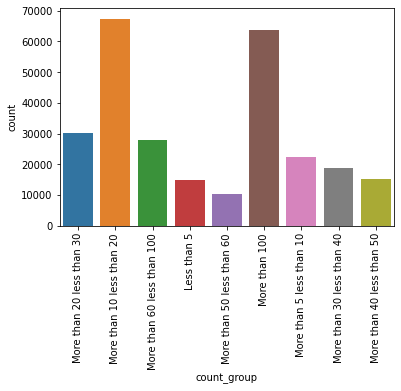

In [128]:
plt.xticks(rotation = 90)
sns.countplot(x='count_group',data = each_user_rate_count)

<AxesSubplot:title={'center':'Movie vote average distribution'}, xlabel='rating', ylabel='count'>

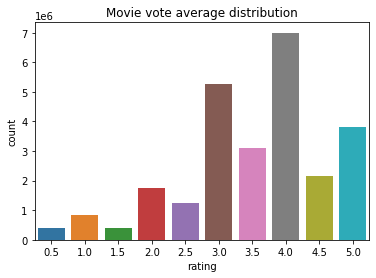

In [129]:
plt.title("Movie vote average distribution")
sns.countplot(x='rating',data = ratings_df)

In [140]:
number_of_voters = ratings_df['userId'].nunique()
number_of_movies = ratings_df['movieId'].nunique()
print("number of unique voters :",number_of_voters,"\nnumber of unique movies :",number_of_movies)

number of unique voters : 270896 
number of unique movies : 45115


In [141]:
top10mostvoted = ratings_df.groupby("movieId").count().reset_index()
top10mostvoted = top_10_voted_movie.sort_values(["userId"],ascending=[False])[0:10]

In [142]:
movies_df['movieId'] = pd.to_numeric(movies_df['movieId'], errors="coerce")
movies_df.dropna(how="any", inplace=True)
movies_df['movieId'] = movies_df["movieId"].astype(np.int64)

In [143]:
top10mostvoted = top10mostvoted.merge(movies_df[["movieId","original_title"]],on="movieId")

In [144]:
top10mostvoted

,movieId,userId,rating,timestamp,original_title
0,318,91082,91082,91082,The Million Dollar Hotel
1,296,87901,87901,87901,Terminator 3: Rise of the Machines
2,593,84078,84078,84078,Солярис
3,260,77045,77045,77045,The 39 Steps
4,480,74355,74355,74355,Monsoon Wedding
5,527,67662,67662,67662,Once Were Warriors
6,110,66512,66512,66512,Trois couleurs : Rouge
7,2959,60024,60024,60024,License to Wed
